# Practicing the Python .plot() API standard on Pandas library
## For Data Science Night - 5 Dec 2018
### Running off preliminary commits to [nu_open_policing](https://github.com/ACiDS-NU/nu_open_policing)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
full=pd.read_csv('IL-clean.csv',low_memory=False)

In [3]:
full.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,vehicle_type,drugs_related_stop,district
0,IL-2004-000001,IL,2004-01-01,00:02,ILLINOIS STATE POLICE 17,NaN,NaN,17,Illinois State Police,F,...,False,NaN,NaN,False,Written Warning,NaN,NaN,Olds 2000,NaN,ILLINOIS STATE POLICE 17
1,IL-2004-000002,IL,2004-01-01,00:07,ILLINOIS STATE POLICE 07,NaN,NaN,07,Illinois State Police,M,...,False,NaN,NaN,False,Written Warning,NaN,NaN,Linc 1990,NaN,ILLINOIS STATE POLICE 07
2,IL-2004-000003,IL,2004-01-01,00:14,ILLINOIS STATE POLICE 11,NaN,NaN,11,Illinois State Police,M,...,False,NaN,NaN,False,Citation,NaN,NaN,Chev 1996,NaN,ILLINOIS STATE POLICE 11
3,IL-2004-000004,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 03,Cook County,17031.0,03,Illinois State Police,F,...,False,NaN,NaN,False,Citation,NaN,NaN,Buic 1992,NaN,ILLINOIS STATE POLICE 03
4,IL-2004-000005,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 09,NaN,NaN,09,Illinois State Police,F,...,False,NaN,NaN,False,Citation,NaN,NaN,Olds 1996,NaN,ILLINOIS STATE POLICE 09


In [4]:
full.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'vehicle_type', 'drugs_related_stop',
       'district'],
      dtype='object')

In [5]:
def SummaryStats(df,label):
    n_stops = df.shape[0]
    n_searches = df['search_conducted'].sum()
    n_hits = df['contraband_found'].sum()
    search_rate = n_searches / n_stops
    hit_rate = n_hits / n_searches
    td={'n_stops' : n_stops, 'n_searches' : n_searches, 'n_hits' : n_hits, 'search_rate' : search_rate,'hit_rate' : hit_rate}
    return pd.DataFrame(data=td,index=[label])

In [6]:
SummarizedStops=SummaryStats(full,'AllStops')
for race in full['driver_race'].unique():
    temp=SummaryStats(full[full['driver_race']==race], race+'Stops')
    SummarizedStops=SummarizedStops.append(temp)
    
SummarizedStops

,hit_rate,n_hits,n_searches,n_stops,search_rate
AllStops,0.205232,38733,188728,4715031,0.040027
WhiteStops,0.245217,21865,89166,3437483,0.025939
BlackStops,0.192979,12507,64810,796114,0.081408
HispanicStops,0.124761,3977,31877,360294,0.088475
AsianStops,0.132319,339,2562,111758,0.022925
OtherStops,0.143770,45,313,9382,0.033362


In [7]:
LocationStops=SummaryStats(full,'Total')
LocationStops['race']='All'
LocationStops['location']='All'
LocationStops['White_hit_rate']=SummarizedStops.loc['WhiteStops']['hit_rate']
LocationStops['White_search_rate']=SummarizedStops.loc['WhiteStops']['search_rate']
for district in full['district'].unique():
    if not isinstance(district,str):
        continue
    tempwhite=SummaryStats(full[(full['driver_race']=='White') & (full['district']==district)], 'White' + ' in ' + district)
    whitehit=tempwhite.get_value('White' + ' in ' + district,'hit_rate')
    whitesearch=tempwhite.get_value('White' + ' in ' + district,'search_rate')
    for race in full['driver_race'].unique():
        #print( race + ' in ' + district)        
        if race=='White':
            temp=tempwhite
        elif race=='Other':
            continue
        else: 
            temp=SummaryStats(full[(full['driver_race']==race) & (full['district']==district)], race + ' in ' + district)
        temp['race']=race
        temp['location']=district
        temp['White_hit_rate']=whitehit
        temp['White_search_rate']=whitesearch
        LocationStops=LocationStops.append(temp)

C:\Users\Matthew\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [8]:
ByRace=LocationStops.groupby('race')

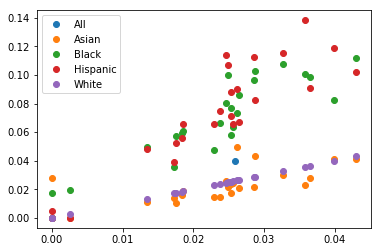

In [9]:
fig, ax = plt.subplots()
for name, group in ByRace:
    ax.plot(group.White_search_rate, group.search_rate, marker='o',linestyle='',label=name)
    
ax.legend()


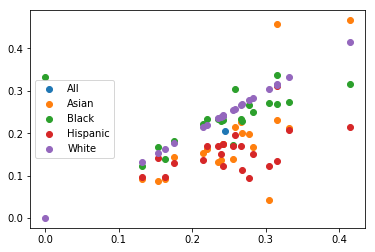

In [10]:
fig, ax = plt.subplots()
for name, group in ByRace:
    ax.plot(group.White_hit_rate, group.hit_rate, marker='o',linestyle='',label=name)
    
ax.legend()

In [11]:
LocationStops['diff_hit_rate']=LocationStops['hit_rate']/LocationStops['White_hit_rate']
LocationStops['diff_search_rate']=LocationStops['search_rate']/LocationStops['White_search_rate']

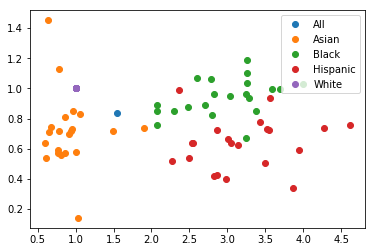

In [12]:
fig, ax = plt.subplots()
for name, group in ByRace:
    ax.plot(group.diff_search_rate, group.diff_hit_rate, marker='o',linestyle='',label=name)
    
ax.legend()

In [13]:
LocationStops

,hit_rate,n_hits,n_searches,n_stops,search_rate,race,location,White_hit_rate,White_search_rate,diff_hit_rate,diff_search_rate
Total,0.205232,38733,188728,4715031,0.040027,All,All,0.245217,0.025939,0.836941,1.543096
White in ILLINOIS STATE POLICE 17,0.241595,733,3034,105809,0.028674,White,ILLINOIS STATE POLICE 17,0.241595,0.028674,1.000000,1.000000
Black in ILLINOIS STATE POLICE 17,0.240000,294,1225,11890,0.103028,Black,ILLINOIS STATE POLICE 17,0.241595,0.028674,0.993397,3.593034
Hispanic in ILLINOIS STATE POLICE 17,0.175676,130,740,9013,0.082104,Hispanic,ILLINOIS STATE POLICE 17,0.241595,0.028674,0.727149,2.863317
Asian in ILLINOIS STATE POLICE 17,0.173469,17,98,2280,0.042982,Asian,ILLINOIS STATE POLICE 17,0.241595,0.028674,0.718017,1.498988
White in ILLINOIS STATE POLICE 07,0.219691,839,3819,145611,0.026227,White,ILLINOIS STATE POLICE 07,0.219691,0.026227,1.000000,1.000000
Black in ILLINOIS STATE POLICE 07,0.234101,254,1085,14840,0.073113,Black,ILLINOIS STATE POLICE 07,0.219691,0.026227,1.065594,2.787664
Hispanic in ILLINOIS STATE POLICE 07,0.170762,139,814,9037,0.090074,Hispanic,ILLINOIS STATE POLICE 07,0.219691,0.026227,0.777281,3.434351
Asian in ILLINOIS STATE POLICE 07,0.161765,22,136,2733,0.049762,Asian,ILLINOIS STATE POLICE 07,0.219691,0.026227,0.736328,1.897334
White in ILLINOIS STATE POLICE 11,0.257607,1380,5357,216970,0.024690,White,ILLINOIS STATE POLICE 11,0.257607,0.024690,1.000000,1.000000
